In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from Reader import *
from Data_Treatement import *

In [2]:
kdiff001 = CustomHDF5Reader('../Res/kdiff/kdiff_001.hdf')
kdiff001.open()

In [3]:
arg_kdiff001 = kdiff001.get_header_attributes()

In [4]:
kdiff001.list_measurements(kdiff001.list_groups()[0])

['Check_Time',
 'Coarse_Time',
 'ISF',
 'MSD',
 'MSD_tot',
 'NRG',
 'PCF',
 'PCF_L',
 'cluster',
 'moves_1']

# Energy

In [2]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','NRG')
data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=50,log_scale=True)

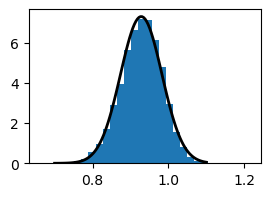

In [48]:
from scipy.stats import norm
plt.figure(figsize=(3,2))
count,bin,ignore = plt.hist(np.concatenate(data_kdiff001.distribution),bins=30,density=True)
mu, sigma = norm.fit(np.concatenate(data_kdiff001.distribution))
x = np.linspace(0.7,1.1, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

(0.9, 1.1)

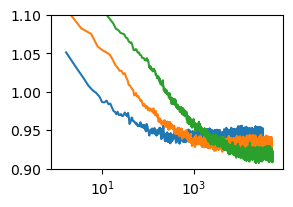

In [40]:
plt.figure(figsize=(3,2))
# import data with 300 processes previous measurement
ST1 = np.load('../Res/kdiff/kdiff_LsV.npy')
ST2 = np.load('../Res/kdiff/kiff_Ls10V.npy')
ST3 = np.load('../Res/kdiff/kiff_Ls100V.npy')
import matplotlib as mpl
import matplotlib.pyplot as plt

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
ax = plt.gca()
ax.xaxis.set_minor_locator(NullLocator())
N = data_kdiff001.attributes['Nlinker']
L = data_kdiff001.attributes['ell_tot']
E = data_kdiff001.attributes['Energy']
plt.plot(ST1[2:,0],(ST1[2:,1]-Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST2[:,0],(ST2[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST3[:,0],(ST3[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.9,1.1)

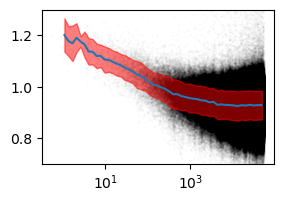

In [3]:
plt.figure(figsize=(3,2))
for i in range(data_kdiff001.Nsample):
    plt.scatter(data_kdiff001.time[i],data_kdiff001.data[i],color='black',alpha=0.01,s=1.)
plt.plot(data_kdiff001.binned_time,data_kdiff001.average_data)
plt.fill_between(data_kdiff001.binned_time,data_kdiff001.average_data-data_kdiff001.variance,data_kdiff001.average_data+data_kdiff001.variance,color='red',alpha=0.5)
plt.ylim(0.7,1.3)
plt.xscale('log')

# clusters

In [2]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','cluster')
#data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=80,log_scale=True)

Text(0, 0.5, 'nearest neighbor distance')

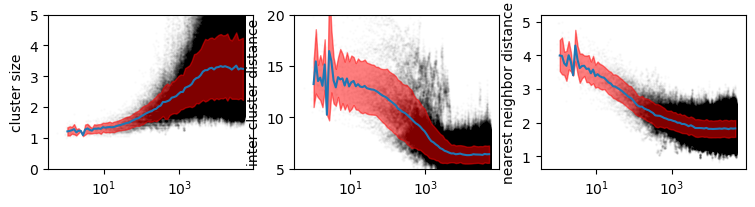

In [6]:
fig,ax = plt.subplots(figsize=(9,2),ncols = 3)
for j in range(3):
    for i in range(data_kdiff001.Nsample):
        ax[j].scatter(data_kdiff001.time[i],data_kdiff001.data[i][:,j],color='black',alpha=0.01,s=1.)
    ax[j].plot(data_kdiff001.binned_time,data_kdiff001.average_data[:,j])
    ax[j].fill_between(data_kdiff001.binned_time,data_kdiff001.average_data[:,j]-data_kdiff001.variance[:,j],data_kdiff001.average_data[:,j]+data_kdiff001.variance[:,j],color='red',alpha=0.5)
    ax[j].set_xscale('log')
ax[0].set_ylim(0.,5)
ax[1].set_ylim(5,20)
ax[0].set_ylabel('cluster size')
ax[1].set_ylabel('inter cluster distance')
ax[2].set_ylabel('nearest neighbor distance')
#ax[0].set_ylim(0)


# MSD
time shift is missing

In [2]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','MSD')
#data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=80)

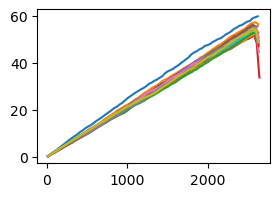

In [7]:
plt.figure(figsize=(3,2))
for j in range(1,data_kdiff001.binned_time.shape[0]):
    plt.plot(data_kdiff001.binned_time[j],data_kdiff001.average_data[j])
